## Applying Logistic Regression

In [180]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 1. Load data

In [181]:
os.chdir(r'D:\Download\other\machine-learning-ex1\machine-learning-ex2\ex2')

os.getcwd()

file = 'ex2data1.txt'

data = []
with open(file, 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = str.strip(line)
        data.append(line.split(','))
data[:3]

### 2. Data Modeling

In [185]:
data_array = np.array(data)
df = pd.DataFrame(data, columns = ['exam1', 'exam2', 'label'])

In [186]:
# The numbers in the dataframe is str type, so we need to change it to numeric
df['exam1'] = pd.to_numeric(df['exam1'])
df['exam2'] = pd.to_numeric(df['exam2'])
df['label'] = pd.to_numeric(df['label'])

#### 2.1 Visualize The training dataset

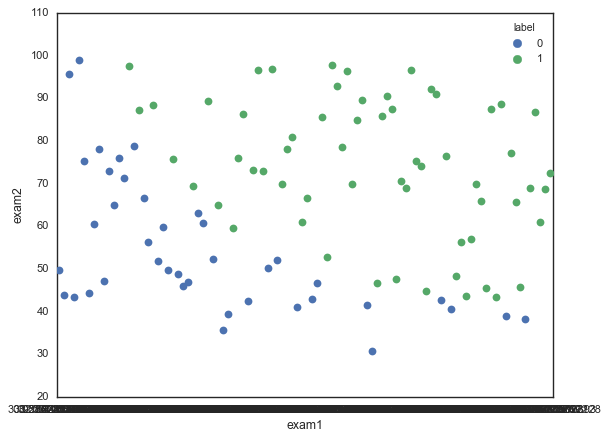

In [187]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.color_palette('husl')
sns.swarmplot(x = 'exam1', y = 'exam2' , hue = 'label', data = df, size =7, edgecolor = None)

## The logic and algorithm behind Logistic Regression

```python
Logistic Regression

h(theta) = g(theta.T @ X)
g(z) = 1/(1+e**(-z)) # logistic/sigmoid function

Cost Function
J(theta) = -1/m * sum[y(i)*log(h(theta(x(i)) + (1-y(i))*log(1-h(theta(x(i))]

Algorithm - Simultaneously converge Theta

{
 theta(j) = theta(j) - alpha * d/d(theta(j)) * J(theta) 
}


```

```python
Propagate function：
forward - propagete (forward propagation)： it is calculating cost
backward - propagate (backward propagation): it is getting derivative terms
These are essential part of Nueral Network
```

#### 2.2 Transform data

In [316]:
# transform the data into array format
x = np.array(df[['exam1','exam2']])
y = np.array(df['label'])

In [317]:
# transform training data
x_0 = np.ones((x.shape[0],2))
# concatenate column x0 to x
x = np.concatenate((x, x_0), axis=1)

In [322]:
# reorder the ndarray's columns 
x = x[:,[2,0,1]

### 3. Creating Algorithm

In [369]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

loss = []
def gradientDescent(x, y, theta=None, alpha=0.001, num_iter=1000):
    
    # the shape of training dataset
    m = x.shape[0]
    num_features = x.shape[1]
    # the shape of theta
    theta = np.zeros((num_features,1))
    counter = 0
    for i in range(num_iter):
        # Hypothesis function
        hypothesis = sigmoid(np.dot(x, theta))
        # Cost function J(theta)
        cost_function = -(1/m) * np.sum(y * np.log(hypothesis.reshape(m)) + (1-y)*np.log(1-hypothesis.reshape(m)))
        # Update theta
        temp = hypothesis
        error = temp.reshape(m) - y
        gradient = (1/m) * (np.dot(x.T, error)) 
        # x.T shape is (features,m); error shape is (m,1); so it ends up with shape of (features,1)

        theta = theta.reshape(num_features) - alpha * gradient
        loss.append(cost_function)
        counter += 1
        if counter >= 0.98 * num_iter:
            print('No.{0} iter\'s loss is {1}'.format(counter, cost_function ))
    print('Theta is {}'.format(theta))
    return theta

```python
Test Code - there were some errors the first version code I wrote because of array dimensionality, so I 
troubleshot each line of code. (This is my stupid method, but I found the problem)

m = x.shape[0]
print('There are %d observations' % m)

num_features = x.shape[1]
print('There are %d features in the training dataset' % num_features)

theta = np.zeros((num_features,1))
print('The shape of theta is {}'.format(theta.shape))

Hypothesis = sigmoid(np.dot(x, theta))
print('The shape of Hypothesis is {}'.format(Hypothesis.shape))

J = -(1/m) * np.sum(y * np.log(Hypothesis.reshape(m)) + (1-y) * np.log(1-Hypothesis.reshape(m)))
print('The error is {0:.6f}'.format(J))

'''
Update theta : Gradient Descent
{
theta(j) := theta(j) - alpha * derivative of cost function J
}

theta(j) := theta(j) - alpha * (Hypothesis - y) * x(j)
'''

error = Hypothesis.reshape(m) - y
print('The shape of error is {}'.format(error.shape))

gradient = (1/m)*np.dot(x.T, error)
print('The shape of gradient {}'.format(gradient.shape))
alpha = 0.001
theta = theta.reshape(num_features) - alpha * gradient
print('The shape of new_theta is {}'.format(theta.shape))

```

### 4. Prediction

In [359]:
# Get the theta. 1 million iteration
trained_theta = gradientDescent(x,y)

No.999995 iter's loss is 0.2246543358362817
No.999996 iter's loss is 0.2246543068454071
No.999997 iter's loss is 0.22465427785458908
No.999998 iter's loss is 0.22465424886382768
No.999999 iter's loss is 0.22465421987312273
No.1000000 iter's loss is 0.22465419088247443


In [360]:
# training set prediction based on our model
prediction = sigmoid(np.dot(x , trained_theta))

pred = []
for i in prediction:
    if i >= 0.5:
        i = 1
        pred.append(i)
    else:
        i = 0
        pred.append(i)

In [367]:
# calculate the accuracy. 
count = 0
for (i,j) in zip(pred,y):
    if i == j:
        count += 1
        
accuracy = count/100
accuracy

0.89

Our model has 89% accuracy in training data set

# Regularization

```python
Why machine learning model? 
Use the model to try to predict future observations, so accuracy of the model is everything.

One of the major aspects of training machine learning model is to avoid OVERFITTING, which happens when the model
tries too hard to capture noises. It ends up with low predicting power. 

One way to address the issue is to reduce the number of features
- manually select which features to keep
- use a model selection algorithm
The other way is REGULARIZATION
- keep all the features, but reduce the magnitude of parameters
- Regularization works well when we have a lot of slightly useful features

REGULARIZATION is a form of regression, that contstrains/regularizes or shrinks the coefficient estimates towards zero.
In other words, this technique discourages learning a more complex or flxible model, so as to avoid the risk of overfitting.

Algorithm:
    
    min(theta) 1/2m * sum(hypothesis - y) + lambda * sum(theta)**2

```

#### Logistice Regression Example - applying Regularization

In [373]:
file = os.listdir()[4]

In [382]:
data = []
with open(file, 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = str.strip(line)
        data.append(line.split(','))

In [387]:
df = pd.DataFrame(data, columns = ['test1', 'test2', 'label'])
df['test1'] = pd.to_numeric(df['test1'])
df['test2'] = pd.to_numeric(df['test2'])


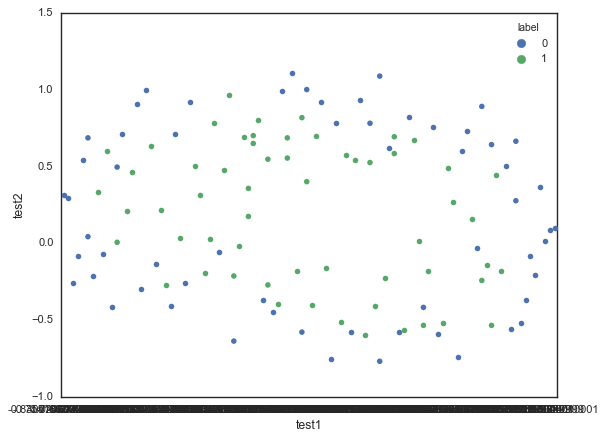

In [388]:
sns.swarmplot(x = 'test1', y = 'test2', hue = 'label', data = df)

The plot shows that the dataset cannot be separated by a straight-line. Therefore, a straight-forward application of 
logistic regression will not perfomr well on this dataset since logistic regression will only be able to find a 
linear decision boundary.

### Feature Mapping

The solution is to create more features from each data point.

For this example, we will map the features into all polynomial terms of x1 and x2 up to the sixth power

In [435]:
def mapfeatures(x1, x2, degree=6):
    output = np.ones(x1.shape[0])
    
    for i in range(0, degree+1):
        for j in range(0, i+1):
            out = (x1 ** (i-j)) * (x2 ** j)
            output = np.vstack((output, out))
    print(output.T.shape)
    
    return output.T